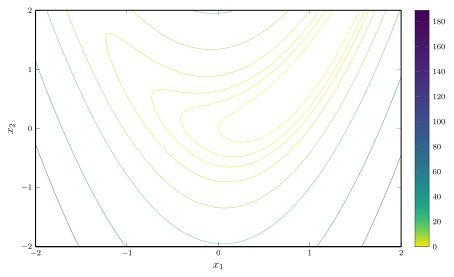

In [35]:
using Plots, LaTeXStrings
pgfplotsx()

# add PGFPlotsX (Textlive, MikTeX)

# Rosenbrock function
f(x1,x2) = (1 - x1)^2 + 5*(x2 - x1^2)^2
∇f(x1,x2) = [2*(10*x1^3-10*x1*x2+x1-1), 10*(x2-x1^2)]

x1 = -2:0.05:2
x2 = -2:0.05:2

pl1 = contour(x1, x2, f, framestyle = :box,
    levels = [1,2,3,5,10,20,50,100], 
    c = cgrad(:viridis, rev = true, scale = :exp),
    ylab = L"x_2", 
    xlab = L"x_1",
    xlims = (-2,2),
    ylims = (-2,2),
    legend = true,
    grid = false,
    label = false)

In [20]:
function bracket_minimum(f, x=0; s=1e-2, k=2.0)
    a, ya = x, f(x)
    b, yb = a + s, f(a + s)
    if yb > ya
        a, b = b, a
        ya, yb = yb, ya
        s = -s
    end

    while true
        c, yc = b + s, f(b + s)
        if yc > yb
            return a < c ? (a, c) : (c, a)
        end
        a, ya, b, yb = b, yb, c, yc
        s *= k
    end
end

bracket_minimum (generic function with 2 methods)

In [21]:
using Base.MathConstants
function fibonacci_search(f, a, b, n; ϵ=0.002)
    s = (1-√5)/(1+√5)
    ρ = 1 / (φ*(1-s^(n+1))/(1-s^n))
    d = ρ*b + (1-ρ)*a
    yd = f(d)
    for i in 1 : n-1
        if i == n-1
            c = ϵ*a + (1-ϵ)*d
        else
            c = ρ*a + (1-ρ)*b
        end
        yc = f(c)
        if yc < yd
            b, d, yd = d, c, yc
        else
            a, b = b, c
        end
        ρ = 1 / (φ*(1-s^(n-i+1))/(1-s^(n-i)))
    end
    return a < b ? (a, b) : (b, a)
end

fibonacci_search (generic function with 1 method)

In [22]:
function line_search(f, x, d)
    objective = α -> f(x + α*d)
    a, b = bracket_minimum(objective)
    α = fibonacci_search(objective, a, b, 100)
    return x + α[1]*d, sum(α)/2
end

line_search (generic function with 1 method)

In [23]:
x = [-1.75,-1.75]
f(x) = (1 - x[1])^2 + 5*(x[2] - x[1]^2)^2

f (generic function with 2 methods)

In [24]:
d = -∇f(x[1],x[2])
xn, α = line_search(f, x, d)

([0.2021315524241203, -1.2098845507126939], 0.011223178167008957)

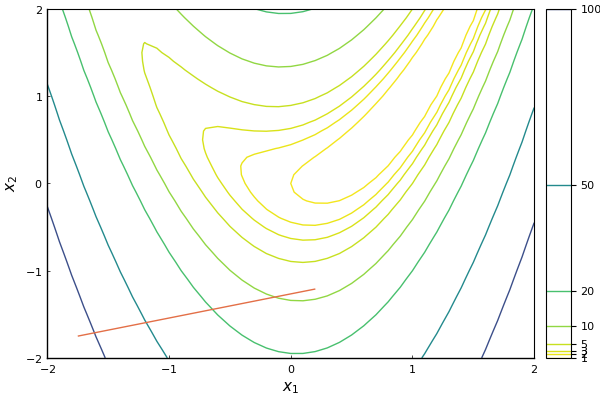

In [25]:
plot!([x[1], xn[1]], [x[2], xn[2]], label="")

In [26]:
ϵ = 10
iters = 0

@time while ϵ > 0.000001
    x = xn
    d = -∇f(x[1],x[2])
    xn, α = line_search(f, x, d)
    plot!([x[1], xn[1]], [x[2], xn[2]], label="")
    ϵ = abs(f(x[1],x[2]) - f(xn[1],xn[2]))
    iters += 1
end

println("Iter = ", iters)

  0.095492 seconds (588.85 k allocations: 33.166 MiB)
Iter = 226


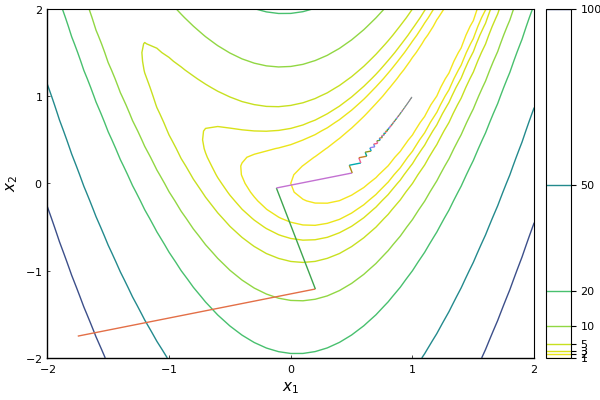

sys:1: UserWarning: The following kwargs were not used by contour: 'label'


In [27]:
plot(pl1)

In [28]:
x

2-element Array{Float64,1}:
 0.9943393801066204
 0.988508743294055